# Ingesting the file

In [1]:
import pandas
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
dataA = pandas.read_excel('Teens_Gaming_2008.xlsx', 'Teens_Gaming_2008',)
dataA.head()
    

,psraid,weight,int_date,tz,cregion,fips,state,msa,usr,usr1,cstatus,p1,p2,kidage,kidgen,...,k4cnt,k6cnt,k7cnt,k8cnt,k9cnt,k14cnt,k26cnt,k29cnt,raceos,modemos,k3dos,k12os,k13os,k17game,k28game
0,634,4.000000,110707,E,1,34017,34,35620,S,2,2,2,1,16,1,...,3.0,3,5,2,3,5.0,4.0,0.0,NaN,NaN,WORK,NaN,NaN,"MADDEN, NBA LIVE, NASCAR",NaN
1,16854,1.333333,12408,E,1,34003,34,35620,S,2,1,1,1,13,2,...,3.0,5,5,3,3,5.0,3.0,1.0,NaN,NaN,A CELL PHONE,NaN,NaN,"THE SIMS 2, CRAZY TAXI 4, SIM PETS","WORD SEARCH, BRAIN TEASERS, POLITICAL GAMES"
2,14856,1.937500,11808,E,1,34003,34,35620,S,2,0,2,2,14,1,...,3.0,5,4,5,3,5.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,"CALL OF DUTY 4, GUITAR HERO 3, ORANGE BOX",NaN
3,14752,1.791667,12108,E,1,34003,34,35620,S,2,2,2,1,12,1,...,2.0,5,5,5,4,10.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,"HALO 3, GUITAR HERO, MARIO GALAXY",NaN
4,115,1.000000,110107,E,1,34003,34,35620,S,2,2,3,1,14,1,...,3.0,5,6,3,4,8.0,1.0,1.0,NaN,NaN,YUOR FRIENDS HOUSE,NaN,NaN,"HALO 3, GUITER HERO, BLOON'S POWER DEFENSE 2",NaN


In [31]:
dataB = dataA[['psraid','educ','income','p2', 'k19']]
dataB.head(5)

,psraid,educ,income,p2,k19
0,634,3,4,1,2.0
1,16854,5,5,1,0.0
2,14856,7,8,2,1.0
3,14752,6,8,1,1.0
4,115,7,6,1,2.0


Every record has a unique id

In [4]:
dataBpsa = dataB['psraid'].groupby([dataB['psraid']]).count().reset_index(name="count")
dataBpsa2 = dataBpsa['count'].groupby(dataBpsa['count']).count().reset_index(name="countCounts")
dataBpsa2



,count,countCounts
0,1,1102


In [5]:
dataBpsa2['countCounts'].min()

1102

/Users/jayspain/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jayspain/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


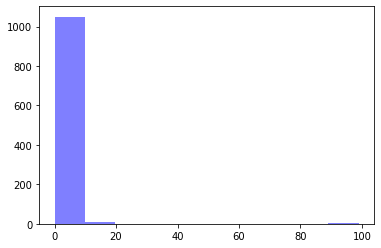

In [32]:
x = dataB['k19']
num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [41]:
dataB.describe()

,psraid,educ,income,p2,k19
count,1102.000000,1102.000000,1102.000000,1102.000000,1064.000000
mean,9934.421960,4.810345,6.032668,1.420145,1.446429
std,5475.367008,1.589978,2.175085,0.678242,6.291967
min,11.000000,1.000000,1.000000,1.000000,0.000000
25%,5404.500000,3.000000,5.000000,1.000000,0.000000
50%,9803.000000,5.000000,6.000000,1.000000,0.000000
75%,14893.250000,6.000000,8.000000,2.000000,1.000000
max,19218.000000,9.000000,9.000000,4.000000,99.000000


# Describe data set by education

In [36]:
dataBeduc = dataB['educ'].groupby([dataB['educ']]).count().reset_index(name="count")
dataBeduc['total']=dataBpsa2['countCounts'].min()
dataBeduc['percent'] = round(dataBeduc['count']/dataBeduc['total'],2)
dataBeduc


,educ,count,total,percent
0,1,23,1102,0.02
1,2,50,1102,0.05
2,3,253,1102,0.23
3,4,54,1102,0.05
4,5,290,1102,0.26
5,6,279,1102,0.25
6,7,149,1102,0.14
7,9,4,1102,0.00


<BarContainer object of 8 artists>

Text(0, 0.5, 'count of records')

Text(0.5, 1.0, 'distribution by education')

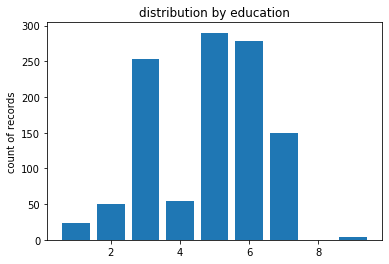

In [7]:
plt.bar (dataBeduc['educ'], dataBeduc['count'])
plt.ylabel("count of records")
plt.title("distribution by education")
plt.show()

Education bins: (1) none/some high school (2) high school graduate (3) vocational education (4) some college (5) college degree (6) some post graduate education or more

# Describe data set by income

In [40]:
dataBincome = dataB['income'].groupby([dataB['income']]).count().reset_index(name="count")
dataBincome['total']=dataBpsa2['countCounts'].min()
dataBincome['percent'] = round(dataBincome['count']/dataBincome['total'],2)
dataBincome



,income,count,total,percent
0,1,37,1102,0.03
1,2,56,1102,0.05
2,3,84,1102,0.08
3,4,98,1102,0.09
4,5,95,1102,0.09
5,6,207,1102,0.19
6,7,178,1102,0.16
7,8,231,1102,0.21
8,9,116,1102,0.11


<BarContainer object of 9 artists>

Text(0, 0.5, 'count of records')

Text(0.5, 1.0, 'distribution by income')

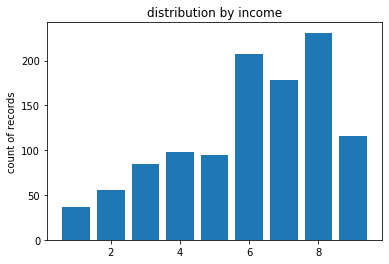

In [9]:
plt.bar (dataBincome['income'], dataBincome['count'])
plt.ylabel("count of records")
plt.title("distribution by income")
plt.show()

Income bins: 
(1) 10k - 20k, 
(2) 20k-30k, 
(3) 30k-40k, 
(4) 40k-50k, 
(5) 50k-75k, 
(6) 75k-100k, 
(7) 100k+

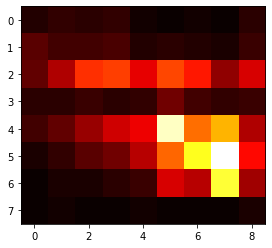

In [10]:
dataBcross = pandas.crosstab(dataB.educ, dataB.income)
plt.imshow(dataBcross, cmap='hot', interpolation='nearest')
plt.show()

# Describe data set by number of teenages in household


In [48]:
dataBp2 = dataB['p2'].groupby([dataB['p2']]).count().reset_index(name="count")
dataBp2['total']=dataBpsa2['countCounts'].min()
dataBp2['percent'] = round(dataBp2['count']/dataBp2['total'],2)
dataBp2

,p2,count,total,percent
0,1,734,1102,0.67
1,2,297,1102,0.27
2,3,47,1102,0.04
3,4,24,1102,0.02


<BarContainer object of 4 artists>

Text(0, 0.5, 'count of records')

Text(0.5, 1.0, 'count of teens in household')

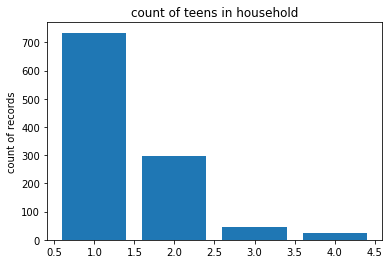

In [12]:
plt.bar (dataBp2['p2'], dataBp2['count'])
plt.ylabel("count of records")
plt.title("count of teens in household")
plt.show()

In [13]:
pd.set_option('display.max_rows', 1000)

# Top games mentioned by each teenager

In [14]:
dataC = dataA[['psraid','k17game','k19']]
c1 = dataC['k17game'].str.split(",", n = -1, expand = True)
C01 = pandas.melt(c1, [0])
C01 = C01.dropna()
C01 = C01[['variable','value']]
C01 = C01['value'].groupby([C01['value']]).count().reset_index(name="count")
C01.head(10)

,value,count
0,,6
1,ALL NEW GAMES THAT JUST CAME OUT,1
2,CALL OF DUTY 4,1
3,DANCE DANCE REVOLUTION,1
4,DUNGEONS AND DRAGONS,1
5,GATE HILLCON,1
6,GUITAR HERO,2
7,I THINK IT'S CALLED THEATER TYCOON,1
8,KARAOKE,1
9,MADDEN,1


The top games are Guitar Hero, Halo 3, and Grand Theft Auto

In [15]:
C01.sort_values(by=['count'], ascending=False).head(10)


,value,count
273,GUITAR HERO,63
290,HALO 3,50
261,GRAND THEFT AUTO,36
162,DANCE DANCE REVOLUTION,32
715,TETRIS,31
367,MADDEN,30
285,HALO,29
638,SOLITAIRE,23
369,MADDEN 08,23
289,HALO 2,22


Evidently, the survey allowed free-form text, which allows for some dirty data, as exemplified by those who do not care to 
correctly spell "Assassin's Creed"

In [16]:
C02 = C01[C01['value'].str.contains('ASSAS')]
C02

,value,count
64,ASSASIN'S CREED,5
65,ASSASSIN'S CREED,8
66,ASSASSINS CREED,1


In [17]:
C03 = C01[C01['value'].str.contains('GRAND')]
C03

,value,count
50,AND GRAND THEFT AUTO,1
261,GRAND THEFT AUTO,36
262,GRAND THEFT AUTO 2K8,1
263,GRAND THEFT AUTO RACING GAME,1
264,GRAND THEFT AUTO VICE CITY,1
265,GRAND THEFT AUTO: SAN ANDREAS,7
266,GRAND THEFT AUTO: SAN ANDRES,1
267,GRAND TURISMO,1


In [18]:
C04 = C01[C01['value'].str.contains('GUITAR')]
C04

,value,count
6,GUITAR HERO,2
273,GUITAR HERO,63
274,GUITAR HERO 2,6
275,GUITAR HERO 3,21
276,GUITAR HERO II,3
277,GUITAR HERO III,2
278,GUITAR HERO III: LEGENDS OF ROCK,2
279,GUITAR HERO2,1


In [19]:
C05 = C01[C01['value'].str.contains('HALO')]
C05

,value,count
51,AND HALO II,1
216,FARCRY VENGEANCE AND HALO 3,1
285,HALO,29
286,HALO 02,1
287,HALO 03,1
288,HALO 1,4
289,HALO 2,22
290,HALO 3,50
291,HALO II,1
292,HALO SERIES,1


# Let's figure out which games belong to which class

In [20]:
c6 = pandas.merge(c1, dataC, left_index=True, right_index=True)
c6.head(5)
list(c6.columns)

,0,1,2,3,4,psraid,k17game,k19
0,MADDEN,NBA LIVE,NASCAR,None,None,634,"MADDEN, NBA LIVE, NASCAR",2.0
1,THE SIMS 2,CRAZY TAXI 4,SIM PETS,None,None,16854,"THE SIMS 2, CRAZY TAXI 4, SIM PETS",0.0
2,CALL OF DUTY 4,GUITAR HERO 3,ORANGE BOX,None,None,14856,"CALL OF DUTY 4, GUITAR HERO 3, ORANGE BOX",1.0
3,HALO 3,GUITAR HERO,MARIO GALAXY,None,None,14752,"HALO 3, GUITAR HERO, MARIO GALAXY",1.0
4,HALO 3,GUITER HERO,BLOON'S POWER DEFENSE 2,None,None,115,"HALO 3, GUITER HERO, BLOON'S POWER DEFENSE 2",2.0


[0, 1, 2, 3, 4, 'psraid', 'k17game', 'k19']

In [21]:
c7 = c6[['psraid',0,1,2,3,4]]
c7.head(5)
c8 = pandas.melt(c7, ['psraid'])
c8 = c8[['psraid','value']]
c8.head(5)
c8.to_csv('c8.csv') 

,psraid,0,1,2,3,4
0,634,MADDEN,NBA LIVE,NASCAR,None,None
1,16854,THE SIMS 2,CRAZY TAXI 4,SIM PETS,None,None
2,14856,CALL OF DUTY 4,GUITAR HERO 3,ORANGE BOX,None,None
3,14752,HALO 3,GUITAR HERO,MARIO GALAXY,None,None
4,115,HALO 3,GUITER HERO,BLOON'S POWER DEFENSE 2,None,None


,psraid,value
0,634,MADDEN
1,16854,THE SIMS 2
2,14856,CALL OF DUTY 4
3,14752,HALO 3
4,115,HALO 3


Borrowing a table from the Clustering work

In [22]:
d2 = pd.read_csv('d2.csv', index_col=0)
d2.head(5)

,psraid,a,b,c,d,e,f,g,h,i,j,k,l
0,11,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,51,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,53,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,56,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,69,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [23]:
c10 = pandas.merge(c8, d2, on='psraid')
c10 = c10.rename(index=str, columns={'value':'game'})
c10 = c10.drop('psraid', axis=1)
c10.head(5)

,game,a,b,c,d,e,f,g,h,i,j,k,l
0,MADDEN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,NBA LIVE,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,NASCAR,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,None,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,None,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [24]:
c11 = pandas.melt(c10, ['game'])
c11.head(5)

,game,variable,value
0,MADDEN,a,1.0
1,NBA LIVE,a,1.0
2,NASCAR,a,1.0
3,None,a,1.0
4,None,a,1.0


In [25]:
c12 = c11.pivot_table(['value'],index=['game'], columns=['variable'], aggfunc=sum)
c12['Max'] = c12.idxmax(axis=1)
c12.columns =[s1+str(s2) for (s1,s2) in c12.columns.tolist()]
c12.reset_index(inplace=True)
c12.columns = [x.strip().replace('value', '') for x in c12.columns]
c12['Max'] = c12['Max'].replace('value', '')
c12['total'] = c12.a + c12.b + c12.c + c12.d + c12.e + c12.f + c12.g + c12.h + c12.i + c12.j + c12.k + c12.l
c12 = c12[['game','Max','total']]
c12.sort_values(by=['total'], ascending=False).head(20)
c12.head(20)

,game,Max,total
925,GUITAR HERO,"(value, k)",528.0
290,HALO 3,"(value, d)",429.0
273,GUITAR HERO,"(value, k)",404.0
943,HALO 3,"(value, c)",364.0
261,GRAND THEFT AUTO,"(value, c)",275.0
983,MADDEN,"(value, g)",241.0
367,MADDEN,"(value, g)",232.0
940,HALO,"(value, d)",226.0
285,HALO,"(value, d)",223.0
289,HALO 2,"(value, d)",199.0


,game,Max,total
0,,"(value, b)",38.0
1,ALL NEW GAMES THAT JUST CAME OUT,"(value, g)",1.0
2,CALL OF DUTY 4,"(value, a)",9.0
3,DANCE DANCE REVOLUTION,"(value, b)",8.0
4,DUNGEONS AND DRAGONS,"(value, b)",7.0
5,GATE HILLCON,"(value, c)",6.0
6,GUITAR HERO,"(value, b)",16.0
7,I THINK IT'S CALLED THEATER TYCOON,"(value, b)",5.0
8,KARAOKE,"(value, b)",3.0
9,MADDEN,"(value, a)",10.0


In [29]:
c13 = c12['total'].groupby([c12['game'],c12['Max']]).max().reset_index(name="FinalMax")  
c13 = c13.rename(index=str, columns={'Max':'gameclass'})
c13.head(20)

,game,gameclass,FinalMax
0,,"(value, b)",38.0
1,ALL NEW GAMES THAT JUST CAME OUT,"(value, g)",1.0
2,CALL OF DUTY 4,"(value, a)",9.0
3,DANCE DANCE REVOLUTION,"(value, b)",8.0
4,DUNGEONS AND DRAGONS,"(value, b)",7.0
5,GATE HILLCON,"(value, c)",6.0
6,GUITAR HERO,"(value, b)",16.0
7,I THINK IT'S CALLED THEATER TYCOON,"(value, b)",5.0
8,KARAOKE,"(value, b)",3.0
9,MADDEN,"(value, a)",10.0


a: fighting games, b: puzzle games, c: action games, d: FPS games, e: strategy games, f: simulation games, g: sports games, h: RPG games, i: adventure games, j: racing games, k: rhythm games & l: survival horror games 

In [30]:

c13 = c13[['game','gameclass']]
c13.to_csv('c13.csv') 